In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import backus_utils as utils

In [91]:
path_to_coeffs = 
path_to_gen2l = 

In [92]:
Nt = 

t1 = 
t2 = 

wmin = 
wmax = 

channel = 

# Fetch Gen-2L correlator data

In [93]:
mean, std, cov = utils.get_sample(path_to_gen2l,channel,n_samples=-1,Nt=32,t1=1,t2=t2)
mean

array([3.02927516e+00, 2.08978915e+00, 1.47022468e+00, 1.04305115e+00,
       7.43093576e-01, 5.30825501e-01, 3.79676747e-01, 2.71918094e-01,
       1.94835304e-01, 1.39735851e-01, 1.00250391e-01, 7.19484264e-02,
       5.16500666e-02, 3.70832718e-02, 2.66337832e-02, 1.91337059e-02,
       1.37462046e-02, 9.87648257e-03, 7.09784416e-03, 5.10153963e-03,
       3.66697778e-03, 2.63611613e-03, 1.89514656e-03, 1.36255206e-03,
       9.79793655e-04, 7.04678838e-04, 5.06821713e-04, 3.64557645e-04,
       2.62392898e-04, 1.88849681e-04, 1.36014516e-04])

# Fetch coefficient data

In [94]:
coeffs = pd.read_csv(path_to_coeffs,header=None).values[:]
coeffs

array([[  -9.73970983,   62.76016632, -133.09373825, ..., -207.49205333,
          65.10342469,  556.04021958],
       [  -6.13860337,   18.64273933,  -10.3030385 , ...,   50.24178921,
           1.54429883,  -95.59802363],
       [  -6.69426585,   17.72619017,    6.91836748, ...,   78.51951313,
         -25.87243096, -210.8126105 ],
       ...,
       [ -13.2152249 ,   80.11001646,  -83.58738051, ...,   -6.13988687,
          -1.27832977,    8.16118335],
       [ -13.22220456,   80.92342791,  -86.40276513, ...,   -6.17853628,
          -1.14895292,    8.49124697],
       [ -13.22357561,   81.67557764,  -89.11787597, ...,   -6.20651477,
          -1.02281701,    8.7960522 ]])

# Plot spectrum

Text(0.5, 0, '$\\omega$')

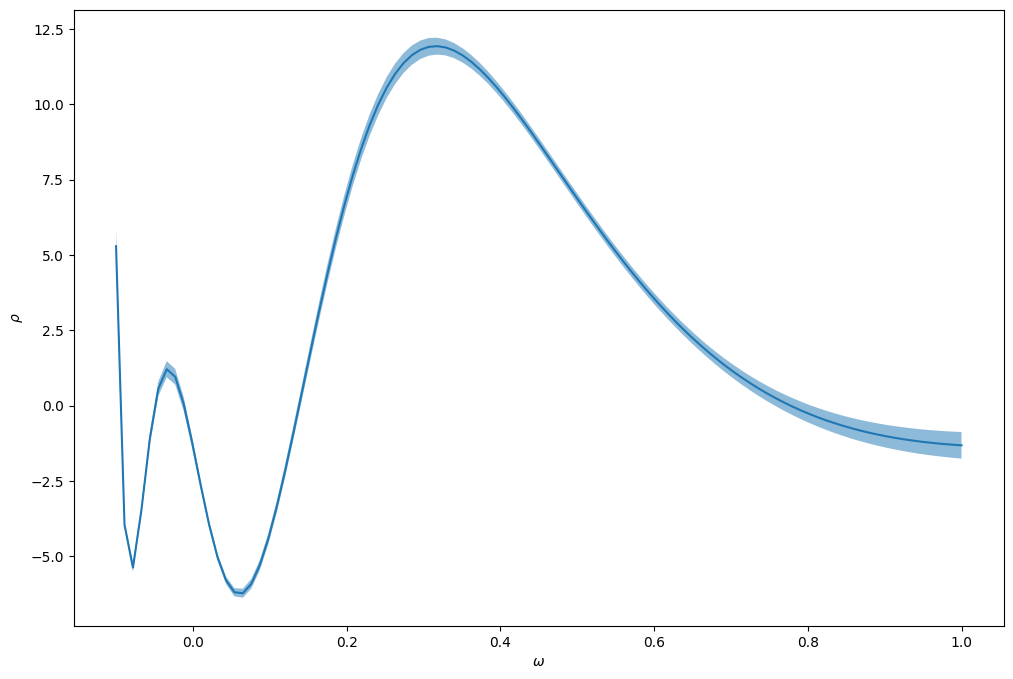

In [105]:
w = np.linspace(wmin,wmax,coeffs.shape[0])
rho = np.matmul(coeffs,mean)
rho_err = np.sqrt(np.diag(np.matmul(np.matmul(coeffs,cov),coeffs.T)))

fig = plt.figure(figsize=(12,8))
ax = plt.gca()

ax.plot(w,rho)
ax.fill_between(w,rho+rho_err,rho-rho_err,alpha=0.5)
ax.set_ylabel(r"$\rho$")
ax.set_xlabel(r"$\omega$")

# Plot averaging functions

In [79]:
t = np.arange(t1,t2)
A = np.matmul(coeffs,np.exp(-w*t.reshape(-1,1)))

Text(0.5, 1.0, '$\\omega_0=$0.01$a_\\tau^{-1}$')

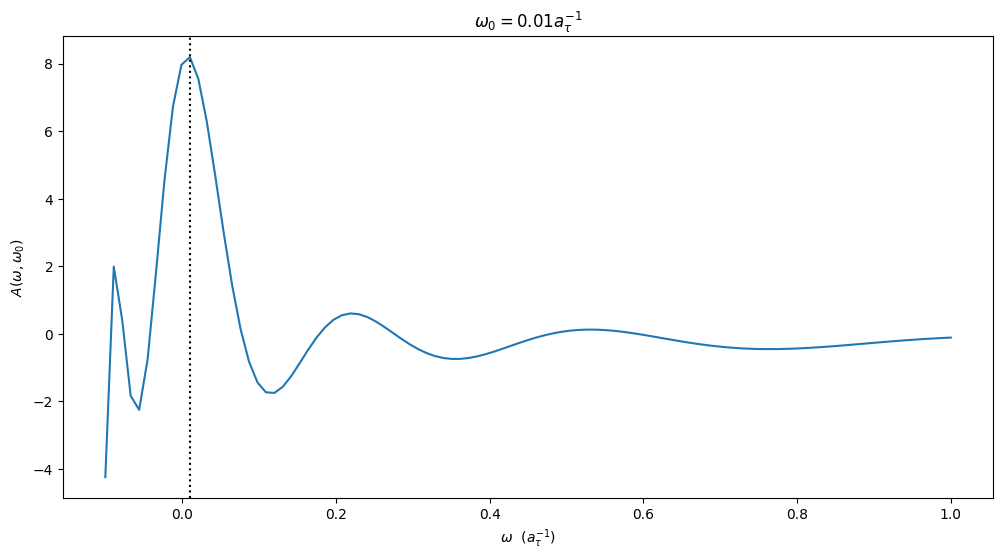

In [80]:
sample_point = 10

plt.figure(figsize=(12,6))
ax = plt.gca()

_ = ax.plot(w,A[sample_point])

ax.axvline(w[sample_point],ls=':',c='k')
ax.set_ylabel("$A(\omega,\omega_0)$")
ax.set_xlabel("$\omega~~(a_\\tau^{-1})$")
ax.set_title(f"$\omega_0=${w[sample_point]:.2f}$a_\\tau^{{-1}}$")

# Test correlator reconstruction

In [106]:
G_rec = []

for t_ in t:
    
    G_rec.append(np.trapz(rho * np.exp(-w*t_), w))

Text(0, 0.5, '$G(\\tau)$')

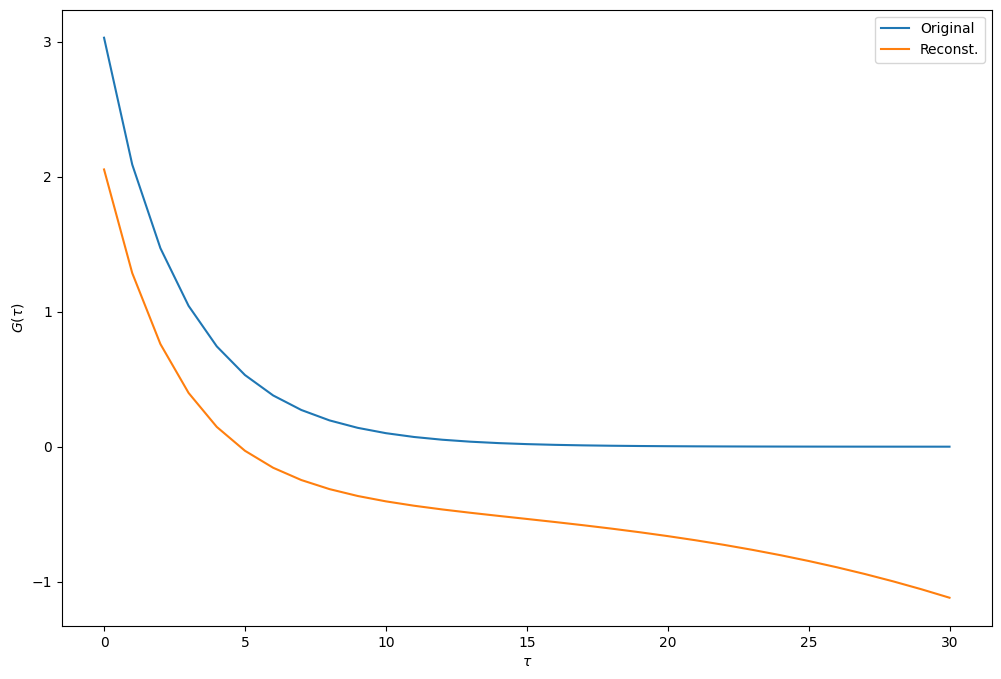

In [107]:
plt.figure(figsize=(12,8))
ax = plt.gca()

ax.plot(mean,label="Original")
ax.plot(G_rec,label="Reconst.")
ax.legend()

ax.set_xlabel(r"$\tau$")
ax.set_ylabel(r"$G(\tau)$")

/tmp/ipykernel_1136003/2919271557.py:5: RuntimeWarning: invalid value encountered in log
  ax.plot(-np.gradient(np.log(G_rec)),label="Reconst.")


Text(0, 0.5, '$G(\\tau)$')

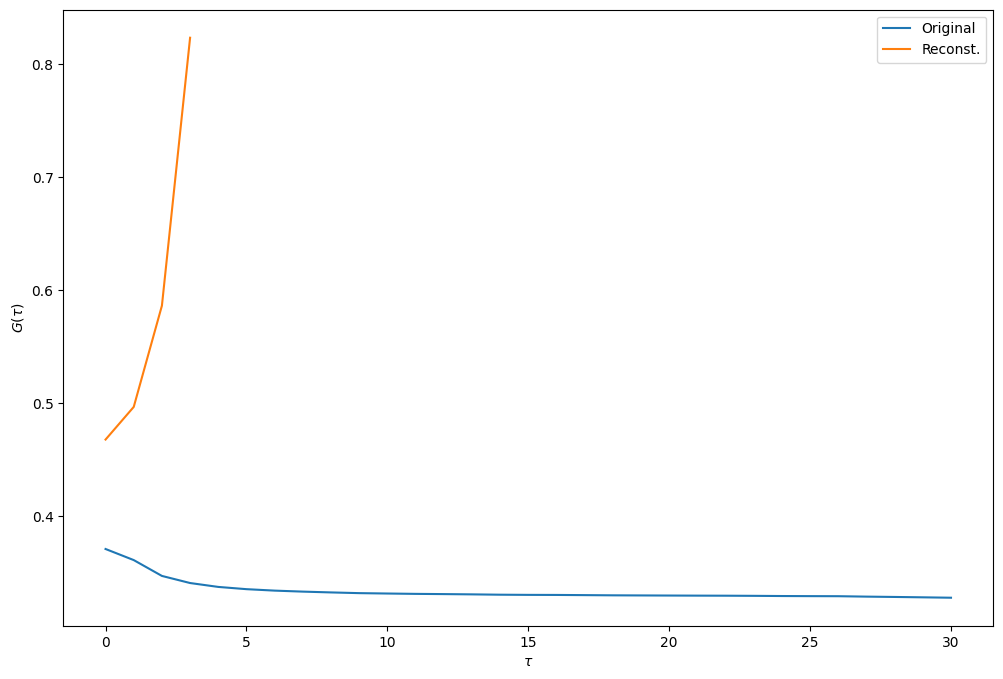

In [108]:
plt.figure(figsize=(12,8))
ax = plt.gca()

ax.plot(-np.gradient(np.log(mean)),label="Original")
ax.plot(-np.gradient(np.log(G_rec)),label="Reconst.")
ax.legend()

ax.set_xlabel(r"$\tau$")
ax.set_ylabel(r"$G(\tau)$")